In [1]:
# 📦 Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 📥 Step 2: Load the dataset
df = pd.read_csv('/content/advertising_sample.csv')  # Update path if needed

# 📌 Preview the data
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (10, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [3]:
# Step 3: Data Exploration

# 🔍 Step 3.1: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
# 📈 Step 3.2: Basic statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
              TV      Radio  Newspaper      Sales
count   10.00000  10.000000  10.000000  10.000000
mean   101.89000  28.110000  43.280000  12.080000
std     84.89945  17.836071  26.850649   5.090034
min      8.60000   2.100000   1.000000   4.800000
25%     24.02500  13.000000  21.775000   9.575000
50%     88.85000  35.300000  51.750000  11.200000
75%    173.47500  40.800000  66.525000  13.125000
max    230.10000  48.900000  75.000000  22.100000


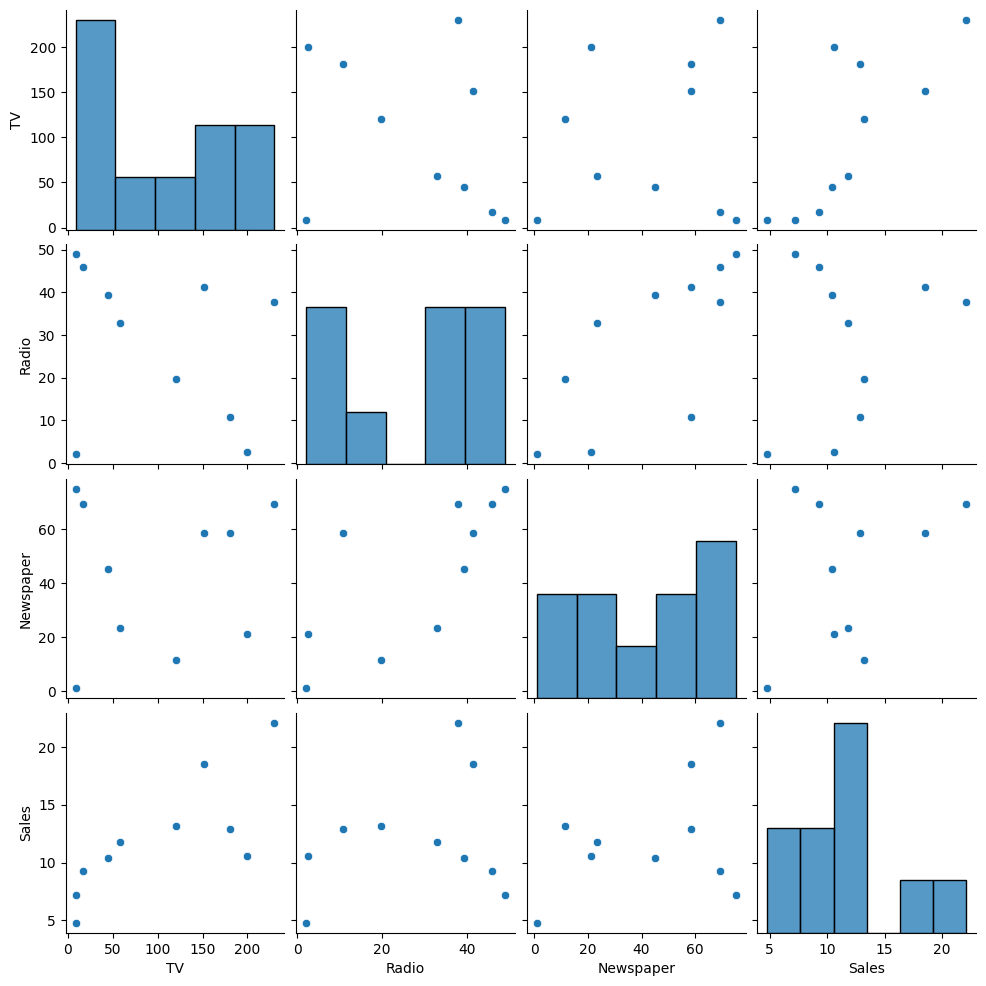

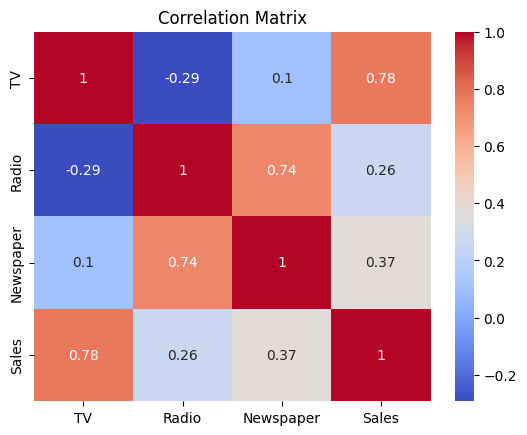

In [5]:
# 📉 Step 3.3: Pairplot and correlation heatmap
sns.pairplot(df)
plt.show()

# Heatmap to understand correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
# Step 4: Data Preprocessing and Splitting

# 🧪 Step 4.1: Define input features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target


In [7]:
# 🧪 Step 4.2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (8, 3)
Testing Set Size: (2, 3)


In [8]:
# 🤖 Step 5: Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✅ Model training completed!")


✅ Model training completed!


In [12]:
# Step 6: Model Evaluation

# 📈 Step 6.1: Predict sales on test set
y_pred = lr_model.predict(X_test)


# 🧮 Step 6.2: Evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation Metrics:
MAE (Mean Absolute Error): 2.65
MSE (Mean Squared Error): 13.20
RMSE (Root Mean Squared Error): 3.63
R² Score: -0.68


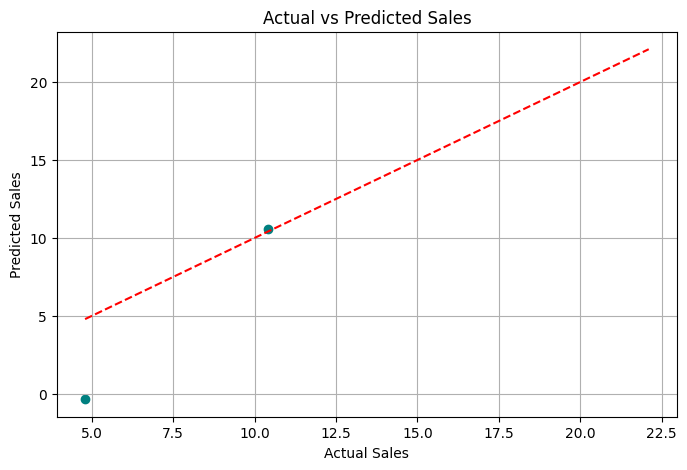

In [13]:
# 📉 Step 6.3: Visualize actual vs predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.show()


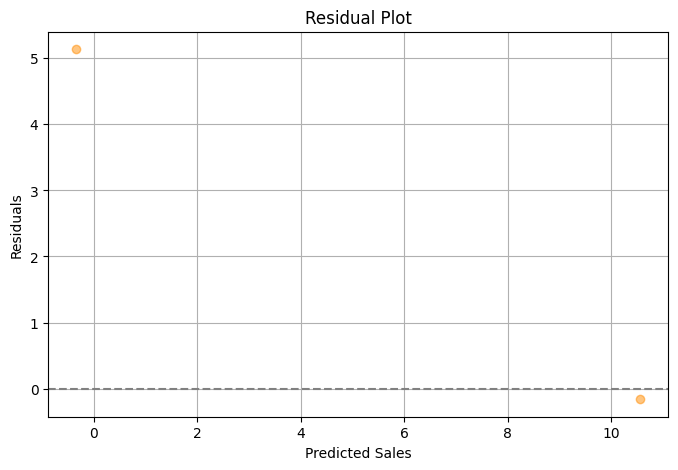

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5, color='darkorange')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [16]:
# 📦 Import
from sklearn.preprocessing import PolynomialFeatures

# ✨ Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 👀 Check new shape
print("New feature shape:", X_poly.shape)


New feature shape: (10, 9)


In [17]:
# 📈 Split with polynomial features
X_train_poly, X_test_poly, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)


In [18]:
# ✅ Train Linear Regression on expanded features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

# 🔮 Predict
y_pred_poly = lin_reg_poly.predict(X_test_poly)


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📊 Evaluate
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("📈 Polynomial Linear Regression Metrics:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))


📈 Polynomial Linear Regression Metrics:
MAE: 7.11
MSE: 74.27
RMSE: 8.62
R² Score: -8.47


In [20]:
# 📦 Import
from sklearn.ensemble import RandomForestRegressor

# 🤖 Train Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# 🔮 Predict
y_pred_rf = rf_reg.predict(X_test)

# 🧮 Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌳 Random Forest Regressor Metrics:")
print("MAE:", round(mae_rf, 2))
print("MSE:", round(mse_rf, 2))
print("RMSE:", round(rmse_rf, 2))
print("R² Score:", round(r2_rf, 2))


🌳 Random Forest Regressor Metrics:
MAE: 3.81
MSE: 17.35
RMSE: 4.17
R² Score: -1.21


In [22]:
import pandas as pd
import numpy as np

# Load your original dataset first
df = pd.read_csv('/content/advertising_sample.csv')

# Get mean and std of each feature
means = df.mean()
stds = df.std()

# Generate 1,000 synthetic rows
synthetic_data = pd.DataFrame({
    'TV': np.random.normal(means['TV'], stds['TV'], 1000),
    'Radio': np.random.normal(means['Radio'], stds['Radio'], 1000),
    'Newspaper': np.random.normal(means['Newspaper'], stds['Newspaper'], 1000),
})

# Generate Sales with some noise (simulate linear relation)
synthetic_data['Sales'] = (
    0.045 * synthetic_data['TV']
    + 0.188 * synthetic_data['Radio']
    + 0.003 * synthetic_data['Newspaper']
    + np.random.normal(3, 1, 1000)
)

# Save to CSV
synthetic_data.to_csv('synthetic_advertising.csv', index=False)

print("Synthetic dataset created with shape:", synthetic_data.shape)


Synthetic dataset created with shape: (1000, 4)


In [23]:
# Step 2: Load the synthetic dataset
import pandas as pd

df = pd.read_csv('/content/synthetic_advertising.csv')

# Quick check
print(df.head())
print("\nDataset shape:", df.shape)
print("\nNull values:\n", df.isnull().sum())


           TV      Radio  Newspaper      Sales
0   81.050003  -2.141762  39.041108   6.779508
1   55.663927  12.669274  13.858751   8.755049
2   79.224583  -1.980223  32.848765   7.542921
3   60.723565  56.916051  81.783819  16.317616
4  251.757073  49.188190  34.755654  22.987957

Dataset shape: (1000, 4)

Null values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


                TV        Radio    Newspaper        Sales
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    106.426736    28.506988    43.921979    13.298285
std      87.066170    17.669152    27.917856     5.099907
min    -148.797694   -30.841542   -48.124972    -1.834674
25%      48.239342    16.844479    24.633037     9.901655
50%     106.333156    28.223446    43.022426    13.187697
75%     163.469856    40.253207    63.964072    16.958960
max     401.259131    92.447234   131.561479    28.931824


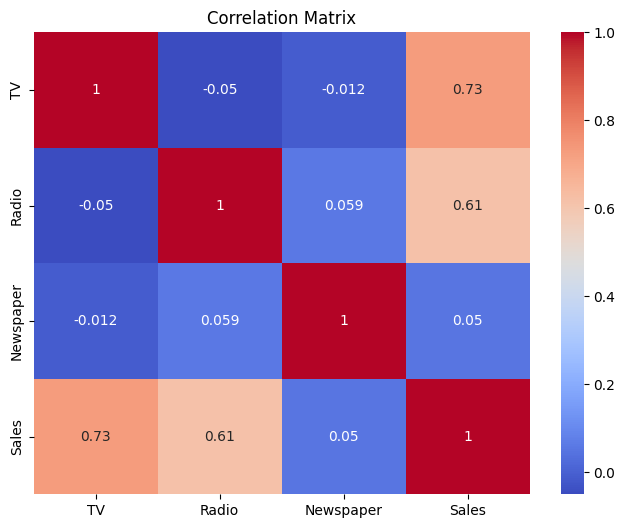

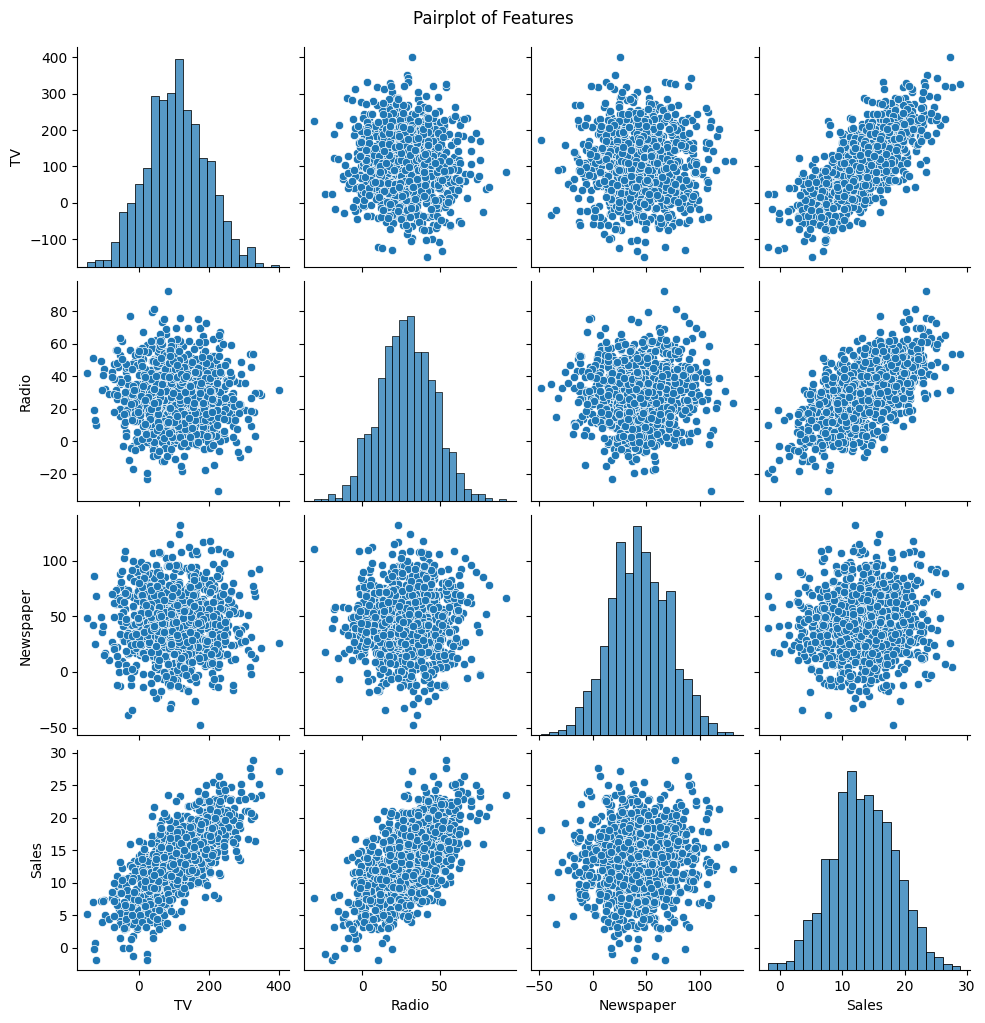

In [24]:
# Step 3: Data Exploration

# Step 3.1: Basic statistics
print(df.describe())

# Step 3.2: Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 3.3: Pairplot
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


In [25]:
# Step 4: Train-test split
from sklearn.model_selection import train_test_split

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (800, 3)
Test set shape: (200, 3)


In [26]:
# Step 5: Train Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Coefficients and intercept
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)


Intercept: 3.018351464157737
Coefficients: [0.04471153 0.18804056 0.00401512]


In [27]:
# Step 6 : Model Evaluation

# Step 6.1: Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Show first 5 predictions for sanity check
print("First 5 Predicted Sales:", y_pred[:5])
print("First 5 Actual Sales:", y_test.values[:5])


First 5 Predicted Sales: [15.46721719  4.71099578  5.58580643 13.29821515 11.98806762]
First 5 Actual Sales: [14.24316587  5.40211163  4.84412331 13.4286299  12.07722814]


In [28]:
# Step 6.2: Compute evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation Metrics:
MAE (Mean Absolute Error): 0.79
MSE (Mean Squared Error): 0.98
RMSE (Root Mean Squared Error): 0.99
R² Score: 0.96


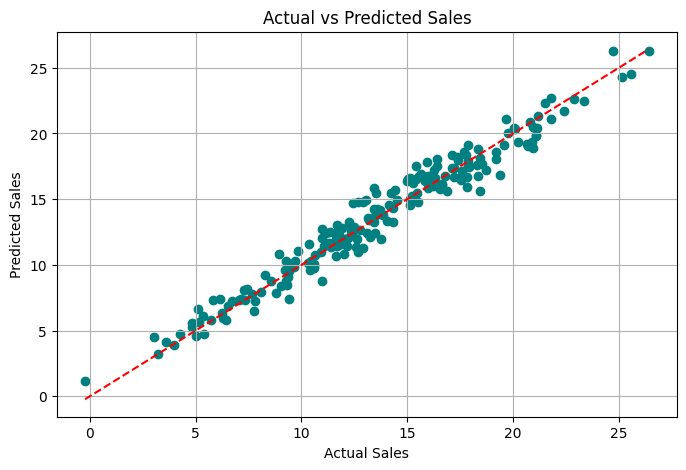

In [29]:
# Step 6.3: Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--',
         color='red')
plt.show()


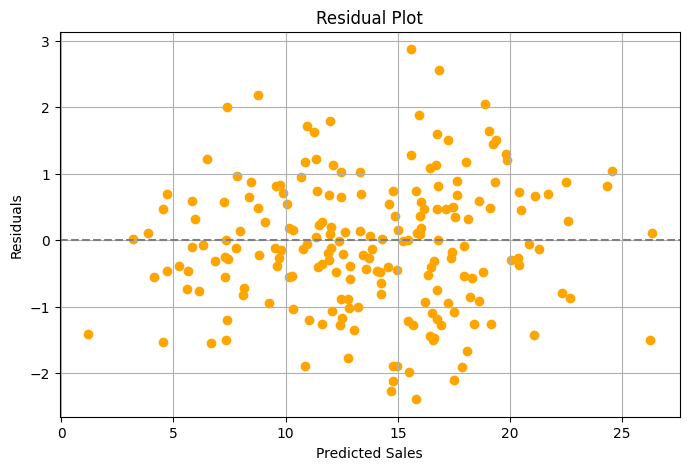

In [30]:
# Step 6.4: Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [31]:
# Step 7: Conclusion and Insights
print("✅ Model Training and Evaluation Completed")
print("\n✨ Final Model Insights:")
print("• The Linear Regression model achieved high accuracy with R² = 0.96.")
print("• Residuals are centered around zero, indicating low bias.")
print("• MAE and RMSE are under 1, showing excellent prediction quality on this dataset.")
print("• The model is suitable for predicting sales given advertising spend.")


✅ Model Training and Evaluation Completed

✨ Final Model Insights:
• The Linear Regression model achieved high accuracy with R² = 0.96.
• Residuals are centered around zero, indicating low bias.
• MAE and RMSE are under 1, showing excellent prediction quality on this dataset.
• The model is suitable for predicting sales given advertising spend.


In [36]:
# 🔮 Predict Sales from manual inputs
print("\n🔍 Enter Advertising Spend to Predict Sales")
tv = float(input("TV Spend: "))
radio = float(input("Radio Spend: "))
newspaper = float(input("Newspaper Spend: "))

# Prepare the input as 2D array
new_data = [[tv, radio, newspaper]]

# Predict
predicted_sales = lin_reg.predict(new_data)

print(f"\n✅ Predicted Sales: {predicted_sales[0]:.2f} units")
2


🔍 Enter Advertising Spend to Predict Sales
TV Spend: 20
Radio Spend: 60
Newspaper Spend: 40

✅ Predicted Sales: 15.36 units


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2